In [4]:
import pandas as pd
import pymongo
from dotenv import load_dotenv
load_dotenv()
import os


Loading the dataset from MongoDB Atlas

In [5]:
MONGO_DB_URL=os.getenv("MONGO_DB_URL")
DATABASE_NAME="HealthAndFitness"
COLLECTION_NAME="Raw Data"
def get_data(MONGO_DB_URL=MONGO_DB_URL,DATABASE_NAME=DATABASE_NAME,COLLECTION_NAME=COLLECTION_NAME)->pd.DataFrame:
    client=pymongo.MongoClient(MONGO_DB_URL)
    db=client[DATABASE_NAME]
    collection=db[COLLECTION_NAME]
    df=pd.DataFrame(list(collection.find()))
    df.drop(columns=['_id'],inplace=True,errors='ignore')
    return df
        
    

Some basic info about the dataset

In [6]:
df=get_data(MONGO_DB_URL,DATABASE_NAME,COLLECTION_NAME)
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [7]:
df.shape

(20000, 54)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [9]:
df.isnull().sum()

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

Dropping unnecessary columns

In [10]:
drop_cols = [
    'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR',
    'cal_balance', 'expected_burn', 'Burns Calories (per 30 min)_bc',
    'Name of Exercise', 'Benefit', 'Workout', 'Body Part', 'Type of Muscle',
    'meal_name', 'meal_type', 'cooking_method', 'rating'
]
df_clean=df.drop(columns=drop_cols,errors='ignore')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            20000 non-null  float64
 1   Gender                         20000 non-null  object 
 2   Weight (kg)                    20000 non-null  float64
 3   Height (m)                     20000 non-null  float64
 4   Max_BPM                        20000 non-null  float64
 5   Avg_BPM                        20000 non-null  float64
 6   Resting_BPM                    20000 non-null  float64
 7   Session_Duration (hours)       20000 non-null  float64
 8   Calories_Burned                20000 non-null  float64
 9   Workout_Type                   20000 non-null  object 
 10  Fat_Percentage                 20000 non-null  float64
 11  Water_Intake (liters)          20000 non-null  float64
 12  Workout_Frequency (days/week)  20000 non-null 

In [11]:
df_clean.select_dtypes(include=['object'])

,Gender,Workout_Type,diet_type,Target Muscle Group,Equipment Needed,Difficulty Level,Burns_Calories_Bin
0,Male,Strength,Vegan,"Shoulders, Triceps",Cable Machine,Advanced,Medium
1,Female,HIIT,Vegetarian,"Back, Core, Shoulders",Step or Box,Intermediate,High
2,Female,Cardio,Paleo,"Quadriceps, Glutes",Step or Box,Intermediate,High
3,Female,HIIT,Paleo,"Biceps, Forearms",Parallel Bars or Chair,Advanced,High
4,Male,Strength,Vegan,"Chest, Triceps",Wall,Advanced,Low
...,...,...,...,...,...,...,...
19995,Female,Strength,Low-Carb,"Quadriceps, Hamstrings, Glutes",Box or Platform,Advanced,Medium
19996,Female,Strength,Vegetarian,"Core, Shoulders, Hips",Dumbbells or Barbell,Intermediate,Low
19997,Male,Strength,Keto,"Upper Back, Rear Deltoids",Barbell,Beginner,High
19998,Male,Yoga,Paleo,"Rear Deltoids, Upper Back",Pull-up Bar,Intermediate,Low


In [12]:
Object_columns=df_clean.select_dtypes(include=['object'])
Object_columns.nunique()

Gender                  2
Workout_Type            4
diet_type               6
Target Muscle Group    36
Equipment Needed       20
Difficulty Level        3
Burns_Calories_Bin      4
dtype: int64

Label Encoding 'Object' dtype columns


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoders={}
df_encoded=df_clean.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    le=LabelEncoder()
    df_encoded[col]=le.fit_transform(df_encoded[col].astype(str)) 
    label_encoders[col]=le


In [14]:
df_encoded.head(20)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,prep_time_min,cook_time_min,Sets,Reps,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,lean_mass_kg,Burns_Calories_Bin
0,34.91,1,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,2,...,16.24,110.79,4.99,20.91,342.58,30,6,0,47.777394,2
1,23.37,0,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,1,...,16.47,12.01,4.01,16.15,357.16,1,18,2,40.809803,0
2,33.20,0,58.98,1.67,175.04,123.95,54.96,0.91,802.26,0,...,54.35,6.09,5.00,21.90,359.63,26,18,2,44.635580,0
3,38.69,0,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,1,...,27.73,103.72,4.01,16.92,351.65,3,14,0,63.007432,0
4,45.09,1,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,2,...,34.16,46.55,4.99,15.01,329.36,5,19,0,43.347504,1
5,53.19,0,105.05,1.84,176.52,130.60,61.84,0.69,453.33,3,...,20.98,54.64,4.00,25.10,374.56,9,17,1,71.382458,3
6,23.17,1,58.41,1.78,184.75,140.90,58.01,1.67,1953.90,2,...,52.43,46.08,5.01,25.04,328.94,7,13,0,46.408911,1
7,55.92,0,84.07,1.63,183.87,141.12,51.79,1.01,727.81,3,...,38.57,36.64,4.97,18.95,363.56,0,15,2,57.093470,3
8,24.11,0,88.58,1.79,176.78,154.07,65.19,1.76,2062.37,2,...,45.85,14.31,3.99,24.10,349.51,35,0,1,64.338094,0
9,39.19,0,50.32,1.60,166.88,128.04,49.91,1.17,1157.25,2,...,18.95,26.51,4.02,16.09,326.31,8,11,2,39.295200,1


In [15]:
#Mapping for the label encoded columns
for col, le in label_encoders.items():
    print(f"\nColumn:{col}")
    for i, class_ in enumerate(le.classes_):
        print(f"  {class_} → {i}")



Column:Gender
  Female → 0
  Male → 1

Column:Workout_Type
  Cardio → 0
  HIIT → 1
  Strength → 2
  Yoga → 3

Column:diet_type
  Balanced → 0
  Keto → 1
  Low-Carb → 2
  Paleo → 3
  Vegan → 4
  Vegetarian → 5

Column:Target Muscle Group
  Back, Biceps → 0
  Back, Core, Shoulders → 1
  Back, Hamstrings, Glutes → 2
  Biceps, Forearms → 3
  Calves → 4
  Chest, Triceps → 5
  Chest, Triceps, Shoulders → 6
  Core → 7
  Core, Lower Back → 8
  Core, Obliques → 9
  Core, Shoulders, Hips → 10
  Core, Shoulders, Legs → 11
  Full Body → 12
  Full Body, Core, Shoulders → 13
  Full Core → 14
  Glutes, Hamstrings → 15
  Glutes, Hamstrings, Core → 16
  Legs, Core → 17
  Legs, Shoulders, Core → 18
  Lower Abs → 19
  Lower Abs, Hip Flexors → 20
  Lower Back, Glutes → 21
  Lower Chest, Triceps → 22
  Obliques, Core → 23
  Quadriceps → 24
  Quadriceps, Calves, Glutes → 25
  Quadriceps, Glutes → 26
  Quadriceps, Hamstrings, Glutes → 27
  Rear Deltoids, Upper Back → 28
  Shoulders → 29
  Shoulders, Triceps

Checking the Correlation


In [16]:
corr=df_encoded.corr()

<Axes: >

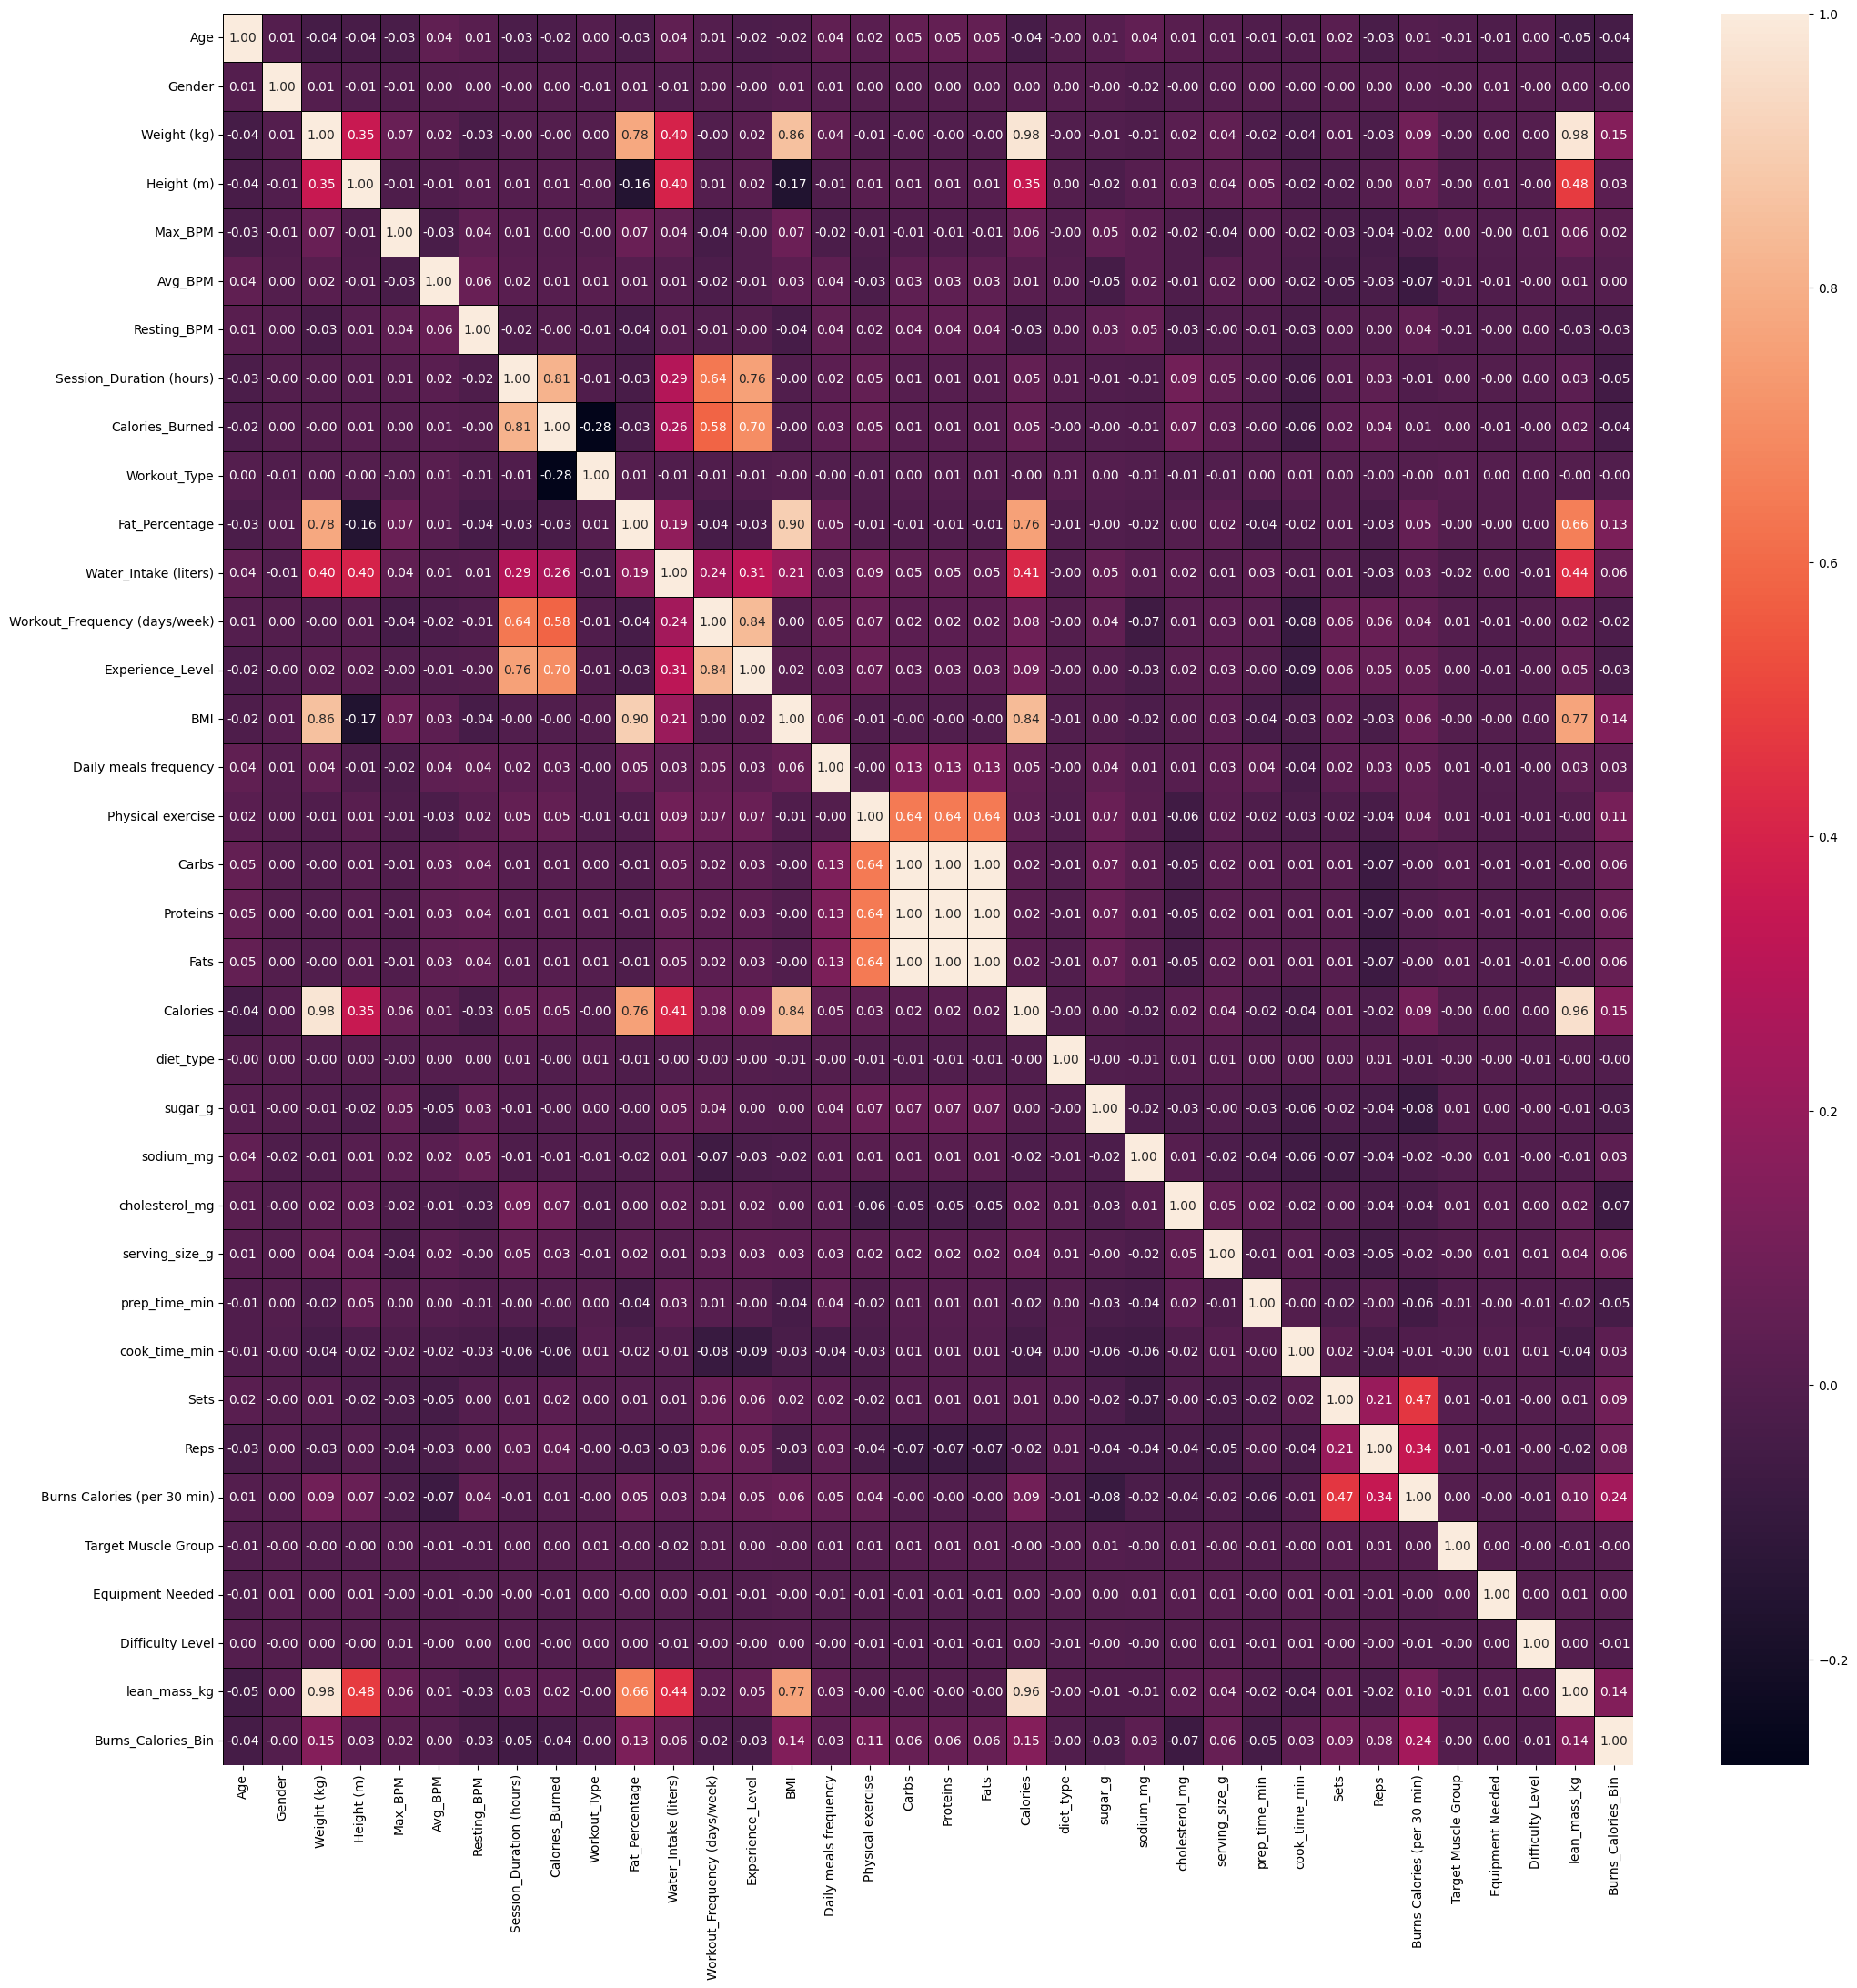

In [17]:

import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(df_encoded.corr(),annot=True,fmt=".2f",linewidths=0.5,linecolor='black')

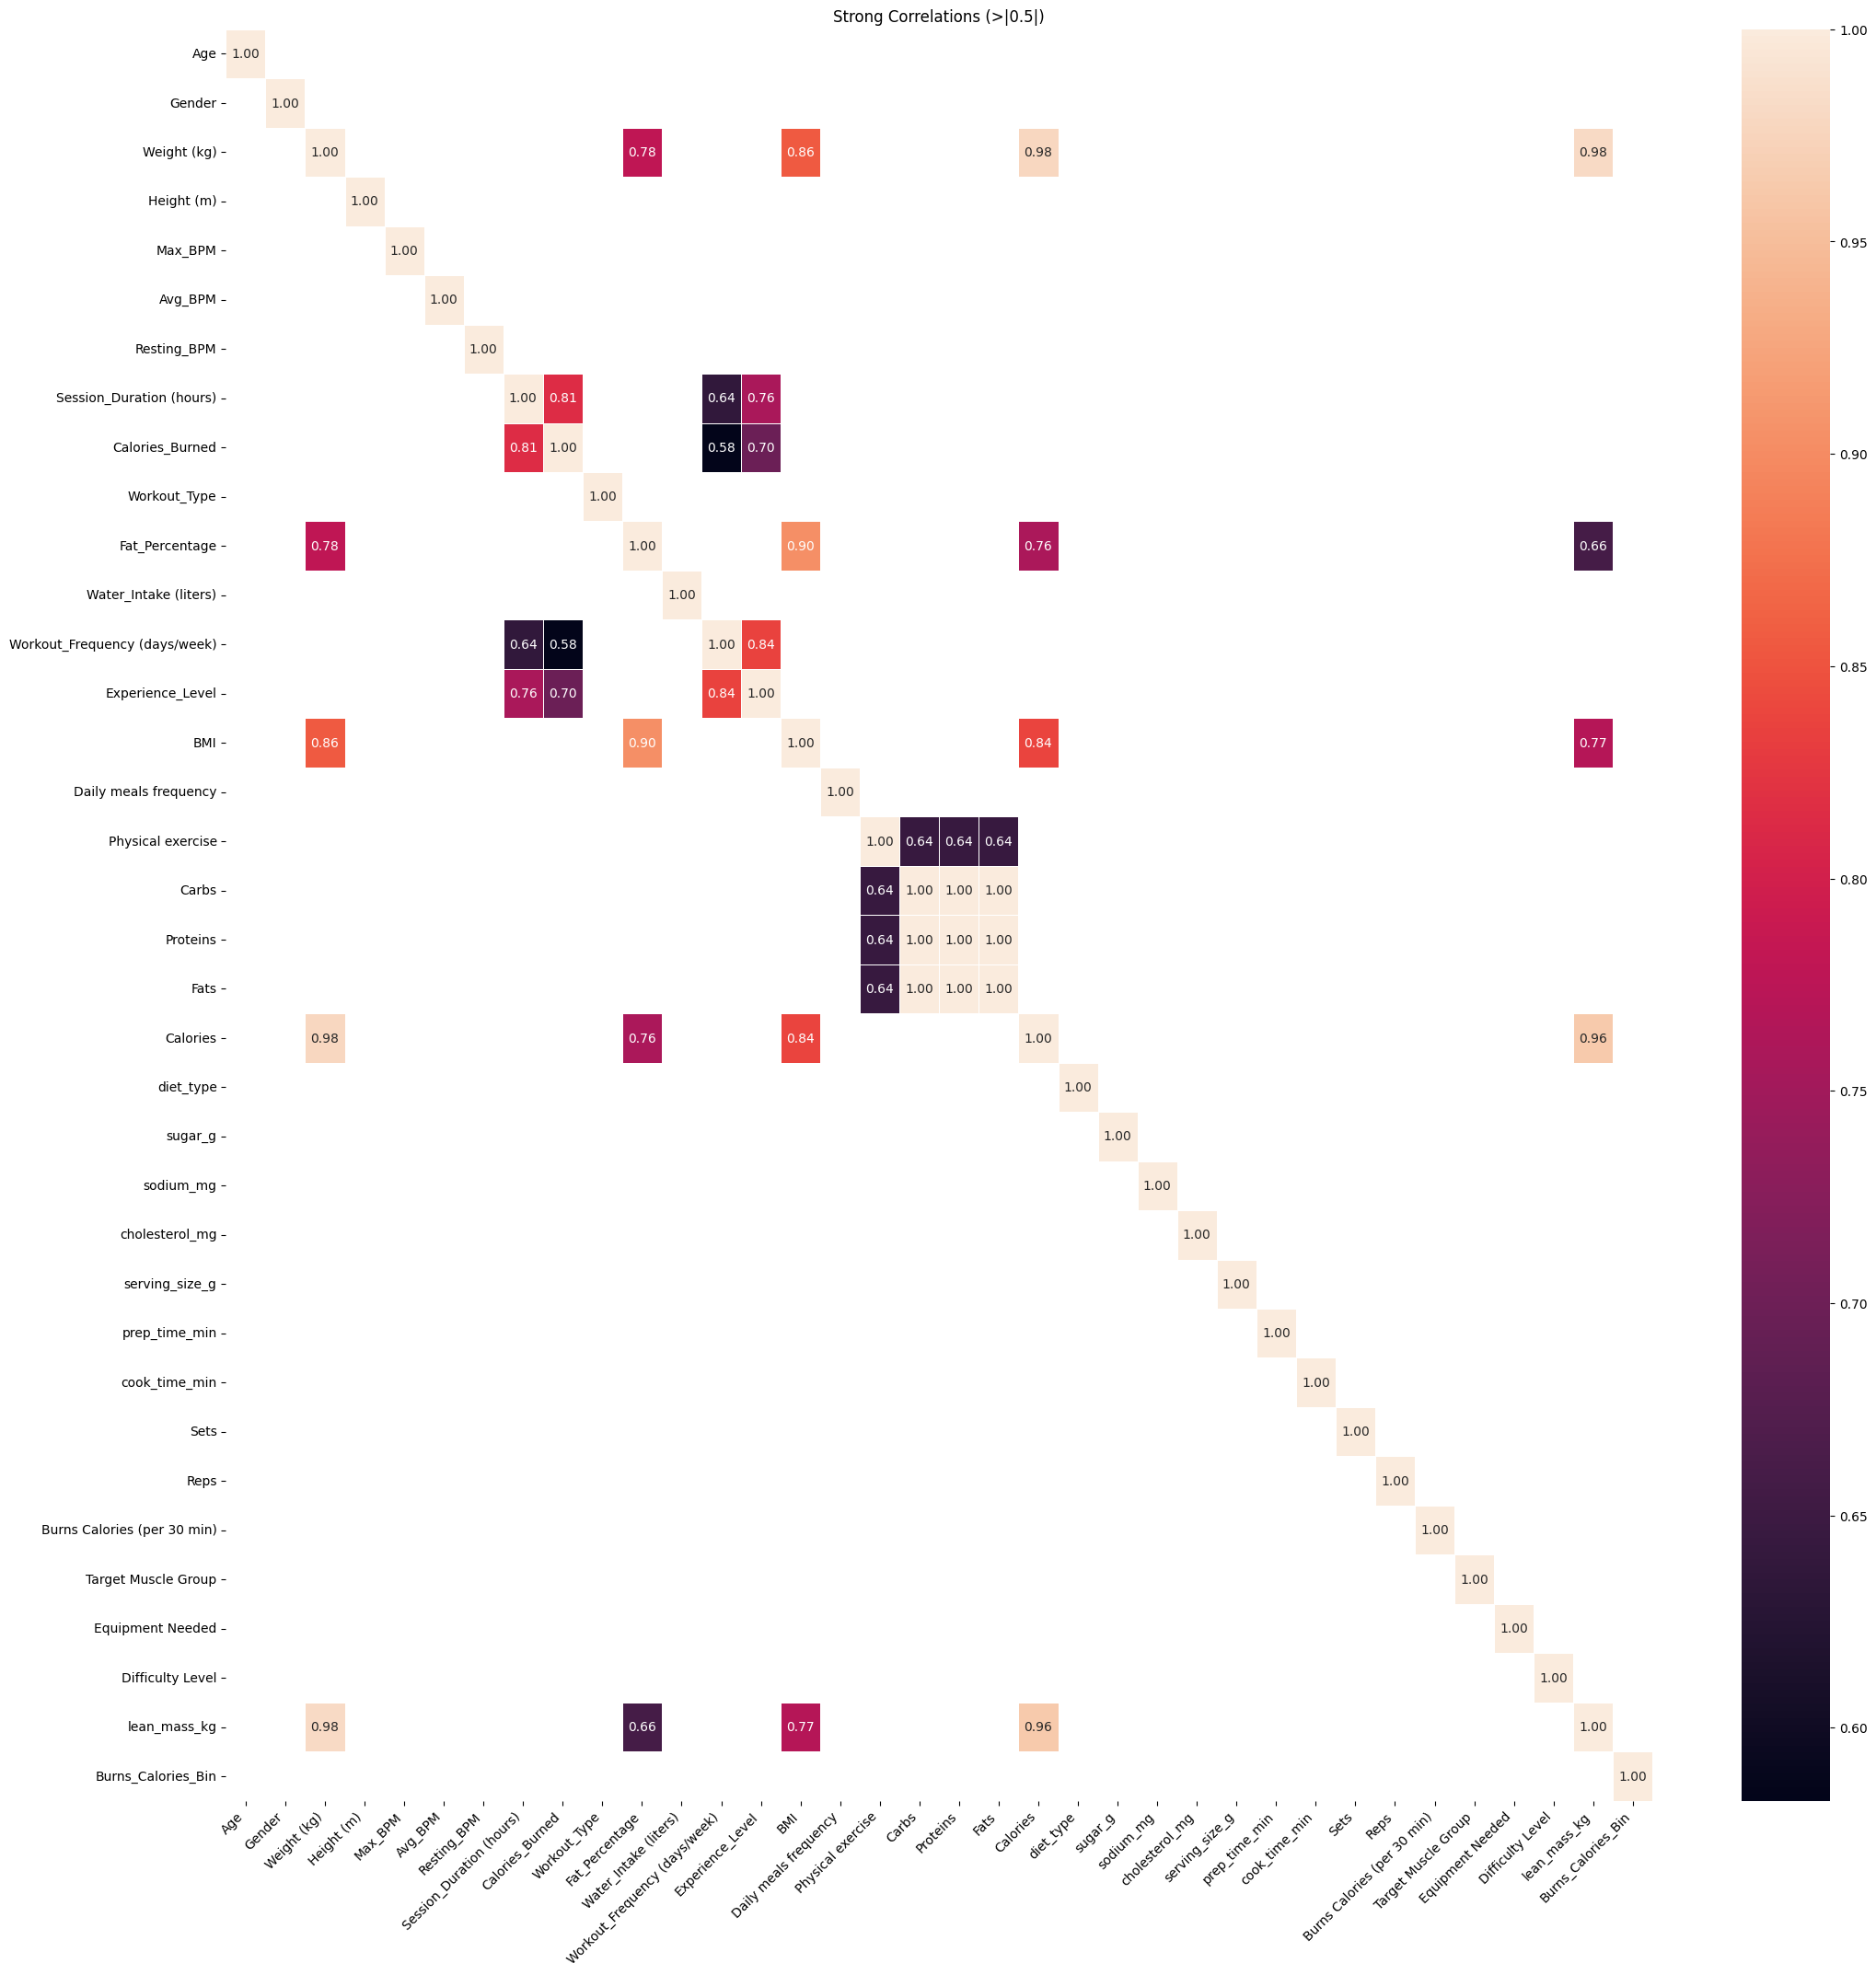

In [18]:
plt.figure(figsize=(25,25))
sns.heatmap(
    corr[(corr >= 0.5) | (corr <= -0.5)], 
    annot=True,fmt=".2f",linewidths=0.5
)
plt.title("Strong Correlations (>|0.5|)")
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.show()


Data Visualization


1. What does the session duration look like across different age groups



Text(0.5, 1.0, 'Age vs Session Duration')

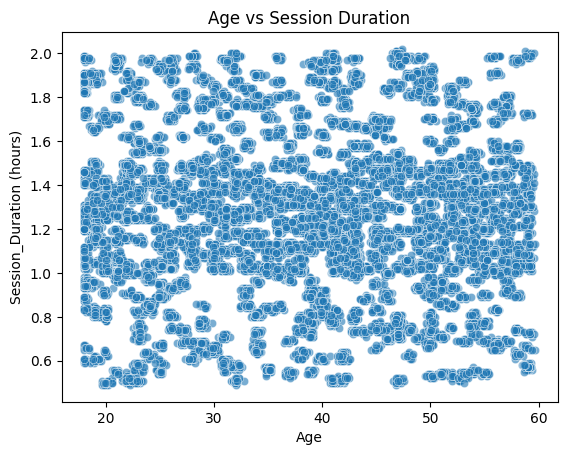

In [19]:
sns.scatterplot(data=df_encoded,x='Age',y='Session_Duration (hours)',alpha=0.6)
plt.title("Age vs Session Duration")


We can see that the avg session duration lies between 1-1.5 hours for all age groups with only a few people having session duration upwards of 2 hours.

2.Which age group has higher fat percentage


/var/folders/z9/mfjky7990sl75cj7j56dg6gh0000gn/T/ipykernel_38512/3642180060.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fat = df_encoded.groupby("Age Group")["Fat_Percentage"].mean().reset_index()
/var/folders/z9/mfjky7990sl75cj7j56dg6gh0000gn/T/ipykernel_38512/3642180060.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=age_fat, x="Age Group", y="Fat_Percentage", palette="coolwarm")


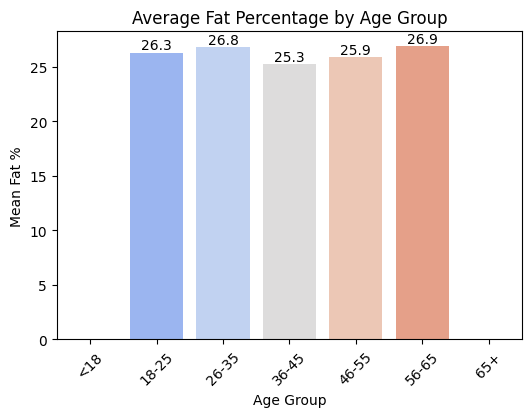

In [ ]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df_encoded['Age Group'] = pd.cut(df_encoded['Age'], bins=bins, labels=labels, right=False)
age_fat = df_encoded.groupby("Age Group")["Fat_Percentage"].mean().reset_index()

plt.figure(figsize=(6,4))
ax=sns.barplot(data=age_fat, x="Age Group", y="Fat_Percentage", palette="coolwarm")
plt.title("Average Fat Percentage by Age Group")
plt.ylabel("Mean Fat %")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10) 
plt.show()

The Fat Percentage is quite evenly spread with age group 56-65 being the highest and 26-35 coming in at a close second